# **1. Data Cleaning**

## **1.1. Dependencies**

In [56]:
%pip install missingno
%pip install seaborn
%pip install nbformat>=4.2.0
%pip install folium
%pip install geopy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
zsh:1: 4.2.0 not found
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 781.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## **1.2. Links to Datasets Used**

**Forbes Billionaires Evolution:** *https://www.kaggle.com/datasets/guillemservera/forbes-billionaires-1997-2023?select=all_billionaires_1997_2023.csv* <br/>
**Genders:** *https://archive.ics.uci.edu/dataset/591/gender+by+name*<br/>
**Capitals:** *https://www.kaggle.com/datasets/sirishasingla1906/countries-of-the-world?resource=download*

## **1.3. Imports**

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

### **1.3.1. For Google Colab** 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
drive_path = "drive/MyDrive/data_science"

df = pd.read_csv("{path}/billionaires.csv".format(path=drive_path))
genders = pd.read_csv('{path}/genders.csv'.format(path=drive_path))
capitals = pd.read_csv('{path}/countries.csv'.format(path=drive_path))

### **1.3.2. For Local Development**

In [82]:
df = pd.read_csv("./billionaires.csv")
genders = pd.read_csv('./genders.csv')
capitals = pd.read_csv('./countries.csv')

## **1.4. Loading Billionaries' Dataset**

In [81]:

print("data frame shape: ", df.shape)
df.head(10)

data frame shape:  (29750, 18)


year  month  rank  net_worth  last_name  \
19 1970-01-01 00:00:00.000002001      7   1.0       58.7      Gates   
20 1970-01-01 00:00:00.000002001      7   2.0       32.3    Buffett   
21 1970-01-01 00:00:00.000002001      7   3.0       30.4      Allen   
22 1970-01-01 00:00:00.000002001      7   4.0       26.0    Ellison   
23 1970-01-01 00:00:00.000002001      6   5.0        5.6     Henkel   
24 1970-01-01 00:00:00.000002001      7   6.0       20.0     Alsaud   
25 1970-01-01 00:00:00.000002001      7   7.0       18.8     Walton   
26 1970-01-01 00:00:00.000002001      7   8.0        4.7  Sainsbury   
28 1970-01-01 00:00:00.000002001      7  10.0       18.5     Walton   
30 1970-01-01 00:00:00.000002001      7  13.0       16.6    Ballmer   

   first_name                         full_name birth_date   age  gender  \
19       Bill                        Bill Gates 1955-10-28  45.0    Male   
20     Warren                    Warren Buffett 1931-01-01  70.0  Female   
21       Paul                        Paul Allen 1953-01-21  48.0    Male   
22   Lawrence                  Lawrence Ellison 1945-01-01  56.0  Female   
23  Christoph                  Christoph Henkel 1958-02-11  43.0    Male   
24     Prince  Prince Alwaleed Bin Talal Alsaud 1957-01-01  44.0  Female   
25        Jim                        Jim Walton 1948-01-01  53.0  Female   
26      David                   David Sainsbury 1941-01-01  60.0  Female   
28      Alice                      Alice Walton 1949-01-01  52.0    Male   
30      Steve                     Steve Ballmer 1956-03-24  45.0    Male   

   country_of_citizenship country_of_residence city_of_residence  \
19          United States        United States            Medina   
20          United States        United States             Omaha   
21          United States        United States     Mercer Island   
22          United States        United States          Atherton   
23                Germany       United Kingdom            London   
24           Saudi Arabia         Saudi Arabia            Riyadh   
25          United States        United States       Bentonville   
26         United Kingdom       United Kingdom            London   
28          United States        United States        Fort Worth   
30          United States        United States       Hunts Point   

   business_industries self_made  wealth_status  birth_year  rank_volatility  
19          Technology     False  Remained Even        1955              NaN  
20             Finance     False  Remained Even        1931              NaN  
21          Technology     False  Remained Even        1953              NaN  
22            Software     False  Remained Even        1945              NaN  
23    Fashion & Retail     False  Remained Even        1958              NaN  
24         Investments     False  Remained Even        1957              NaN  
25              Retail     False  Remained Even        1948              NaN  
26              Retail     False  Remained Even        1941              NaN  
28              Retail     False  Remained Even        1949              NaN  
30          Technology     False  Remained Even        1956              NaN

## **1.5. Visualizing nulls**

============== Features Data Types ============== 
 year                          int64
month                         int64
rank                        float64
net_worth                    object
last_name                    object
first_name                   object
full_name                    object
birth_date                   object
age                         float64
gender                       object
country_of_citizenship       object
country_of_residence         object
city_of_residence            object
business_category            object
business_industries          object
organization_name            object
position_in_organization     object
self_made                    object
wealth_status                object
dtype: object
============== Null Values Counts ============== 
 year                            0
month                           0
rank                           18
net_worth                       0
last_name                    3689
first_name                   

<Axes: >

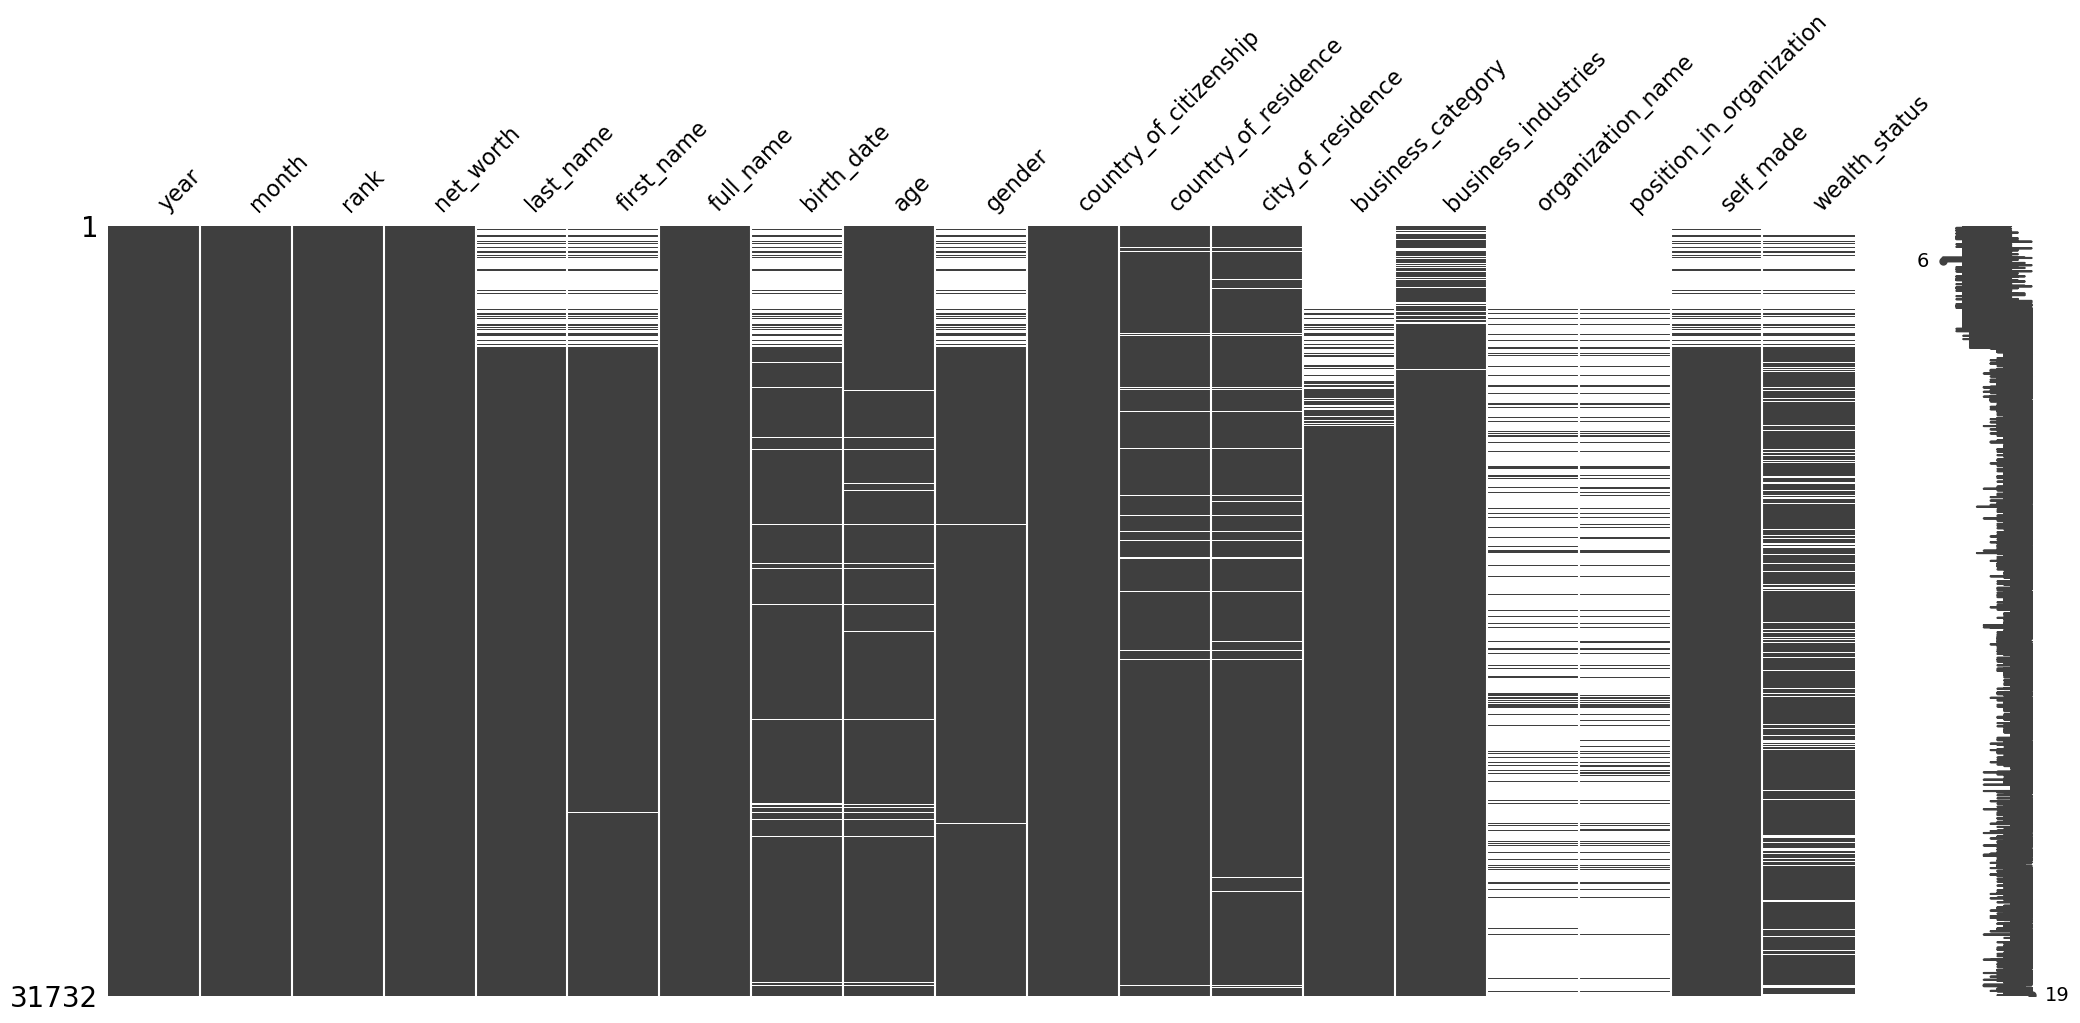

In [8]:
print("============== Features Data Types ============== \n", df.dtypes)
print("============== Null Values Counts ============== \n", df.isnull().sum())
msno.matrix(df)

## **1.6. Cleaning Features**


### **1.6.1. Filling empty first_name and last_name**

In [83]:
first_name_list = list(df.first_name.isnull().index)
last_name_list = list(df.last_name.isnull().index)

# filling the first name
df.loc[first_name_list, 'first_name'] = (df.loc[first_name_list, 'full_name']
                                        .str
                                        .split()
                                        .apply(lambda x: x[0]))

# filling the second name
df.loc[last_name_list, 'last_name'] = (df.loc[last_name_list, 'full_name']
                                        .str
                                        .split()
                                        .apply(lambda x: x[-1]))

### **1.6.2. Cleaning net_worth from prefixes and casting it to float**

In [84]:
if df['net_worth'].dtype != 'float64':
  df['net_worth'] = df['net_worth'].str.replace('B', "").astype(float)

### **1.6.3. Deducing age and birth_year from birth_date**


In [85]:
# df['birth_date'] = pd.to_datetime(df['birth_date'])
# df['birth_year'] = df['birth_date'].dt.year.astype('Int64')

# age_list = list(df.age.isna())
# birth_year_list = list(df.birth_year.isna())
# birth_date_list = list(df.birth_date.isna())

# # fill empty birth years
# df.loc[birth_year_list, 'birth_year'] = df.loc[birth_year_list, 'year'] - df.loc[birth_year_list, 'age']

# # fill empty ages
# df.loc[age_list, 'age'] = df.loc[age_list, 'year'] - df.loc[age_list, 'birth_year']




df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['birth_year'] = df['birth_date'].dt.year.astype('Int64')

df['both_missing'] = (df['age'].isna() & df['birth_date'].isna())

# Fill missing birth_year with year - age
missing_year = ~df['both_missing'] & df['birth_year'].isna() & ~df['age'].isna()
df.loc[missing_year, 'birth_year'] = df.loc[missing_year, 'year'] - df.loc[missing_year, 'age']

# Fill missing age with year - birth_year
missing_age = ~df['both_missing'] & df['age'].isna() & ~df['birth_year'].isna()
df.loc[missing_age, 'age'] = df.loc[missing_age, 'year'] - df.loc[missing_age, 'birth_year']

# Fill missing birth_date with first day of the year
missing_birthdate = ~df['both_missing'] & df['birth_date'].isna() & ~df['birth_year'].isna()
df.loc[missing_birthdate, 'birth_date'] = pd.to_datetime(df.loc[missing_birthdate, 'birth_year'].astype(str) + '-01-01')

df.drop('both_missing', axis=1, inplace=True)

In [ ]:
# # fill empty birth_date
# birth_year_null = df['birth_year'].isna()
# birth_date_null = df['birth_date'].isna()
# filtered_df = birth_date_null & ~birth_year_null

# rand_days = np.random.randint(1, 29, sum(filtered_df)) # is not a default dd/mm better?

# df.loc[filtered_df, 'birth_date'] = (pd.to_datetime(
#                                       df.loc[filtered_df, 'birth_year'].astype(str) +
#                                       '-' +
#                                       df.loc[filtered_df, 'month'].astype(str) +
#                                       '-' +
#                                       rand_days.astype(str)))

### **1.6.4. Deduce gender from first_name**


In [88]:

name_gender_map = dict(zip(genders['Name'], genders['Gender'].map({'M': 'Male', 'F': 'Female'})))
df.loc[df['gender'].isnull(), 'gender'] = df.loc[df['gender'].isnull(), 'first_name'].map(name_gender_map)

df["gender"].isnull().sum()

479

### **1.6.5. Filling country_of_residency**


In [89]:
residency_list = list(df.country_of_residence.isnull())
df.loc[residency_list, 'country_of_residence'] = df.loc[residency_list, 'country_of_citizenship']

citizenship_list= list(df.country_of_citizenship .isnull())
df.loc[citizenship_list,'country_of_citizenship'] = df.loc[citizenship_list,'country_of_residence']

### **1.6.6. Dropping unncessary features**


In [90]:
for feature in ['position_in_organization', 'organization_name', 'business_category']:
    if feature in df:
        del df[feature]

### **1.6.7. Deducing self_made feature from year's self_made mean**

In [91]:
avg_self_made = df.groupby('year')['self_made'].mean()
self_made_list = list(df.self_made.isnull())
df.loc[self_made_list, 'self_made'] = (df.loc[self_made_list, 'year']
                                         .apply(lambda year: round(avg_self_made[year]) == 1))

###  **1.6.8. Filling empty wealth_status values** (TBD)

In [92]:
# Determine it from previous year
status_list = list(df.wealth_status.isnull())
df.loc[status_list, 'wealth_status'] = "Remained Even"

### **1.6.9. Filling empty city_of_residence values**

In [93]:
def getCapital(name):
    records = capitals[capitals['Countries'] == name]
    if len(records) == 0:
        return np.nan
    else:
        record = records.iloc[0]
        return record['Capital']

empty_valuses = df['city_of_residence'].isnull()
df.loc[empty_valuses, 'city_of_residence'] = df.loc[empty_valuses, 'country_of_citizenship'].apply(lambda x: getCapital(x))

### **1.6.10. Dropping remaining nulls**

In [94]:
df= df.dropna()

### **1.6.11. Clean business_industries feature**

In [95]:
def clean_industry(x: str):
    x = re.sub(r'[\[\]\'\']', '', x)
    x = re.sub(r'\s+and\s+', ' & ', x)
    x = re.sub(r'\s+&#38;\s+', ' & ', x)

    return x.strip()

df.loc[:, 'business_industries'] = df['business_industries'].apply(clean_industry)
df.loc[df['business_industries'].str.lower().isin(['healthcare', 'health care']), 'business_industries'] = "Healthcare"

# **2. Visualizations**

## **2.1. Internal Questions**

### **2.1.1. Average age across industries with respect to citizenship and gender**
**Q: How does the average age at which billionaires achieve their status differ across industries, countries of origin, and gender over the years of study?**

**Observations:**
- Business Industries:
    - The average age varies significantly across different industries. Billionaires from industries like "Gambling & Casinos" and "Hotels & Resorts" tend to have a higher average age compared to those from other industries. This pattern is preserved over the years.
- Countries of Origin:
    - Billionaires from "China" and "Russia" tend to achieve their status at a much younger age compared to other countries across most industries. Billionaires from "Germany" and "the United States" tend to have the highest average age across all. This pattern is preserved over the years.
- Gender:
    - The difference between the average age of billionaires across genders does not vary hugely across industries, it is almost about 2 to 5 or 7 years.
    - However, some industries like "Medicine", "Consumer Products", and "Hotels & Resorts" tend to have a huge difference in average age between the genders of about 20 to 40 years for females, meaning they achieve wealth relatively late compared to males in these industries.
    - In recent years (2017 to 2023), however, the difference is subtle with males achieving wealth about 2 to 5 years later compared to females.

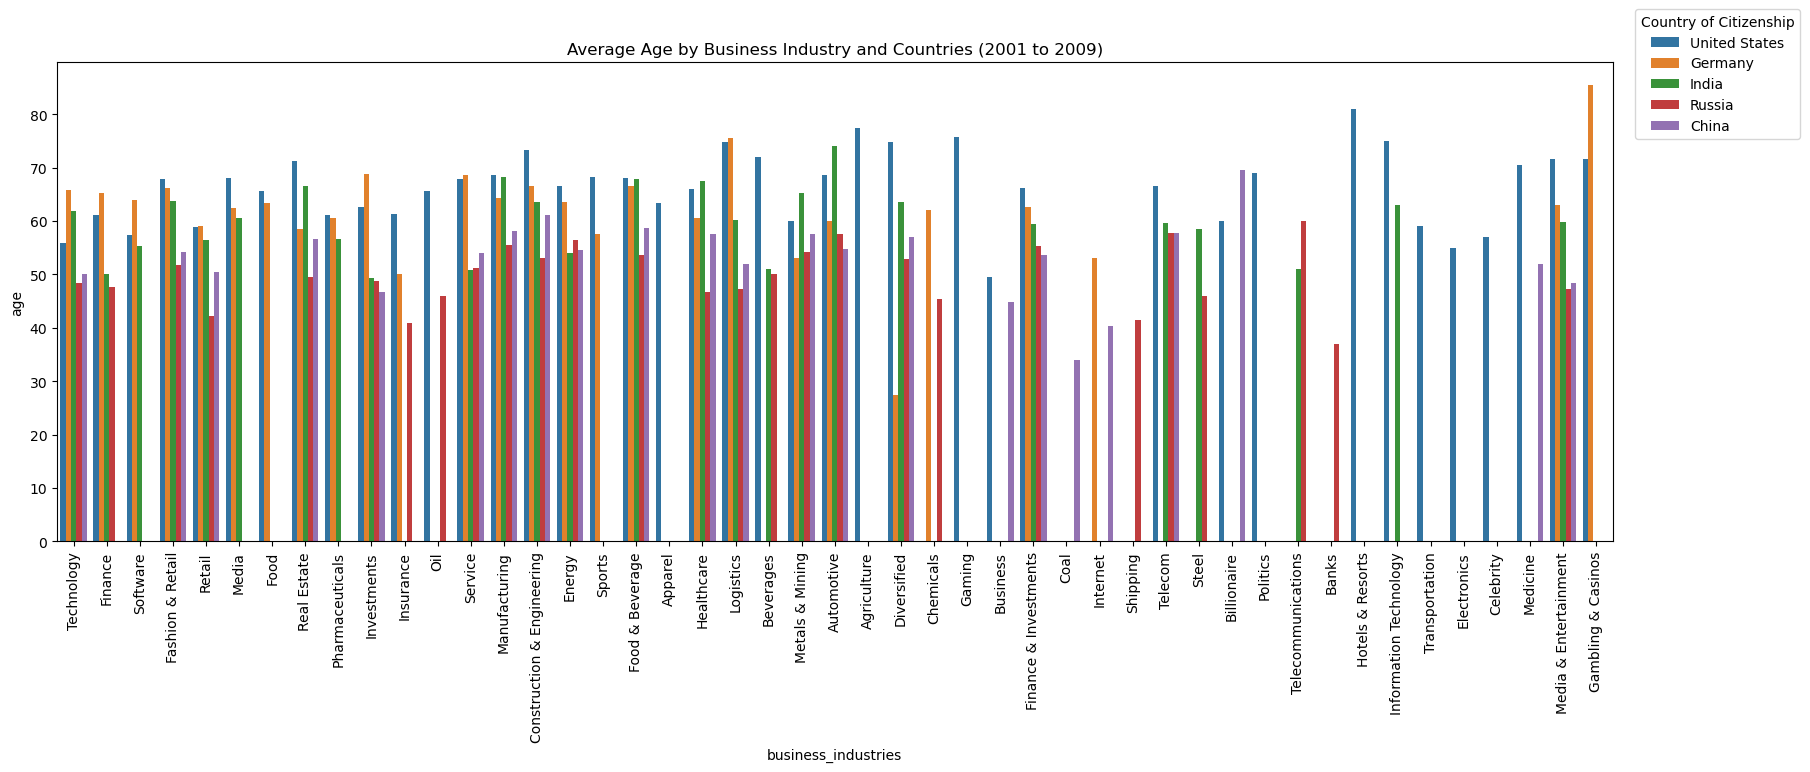

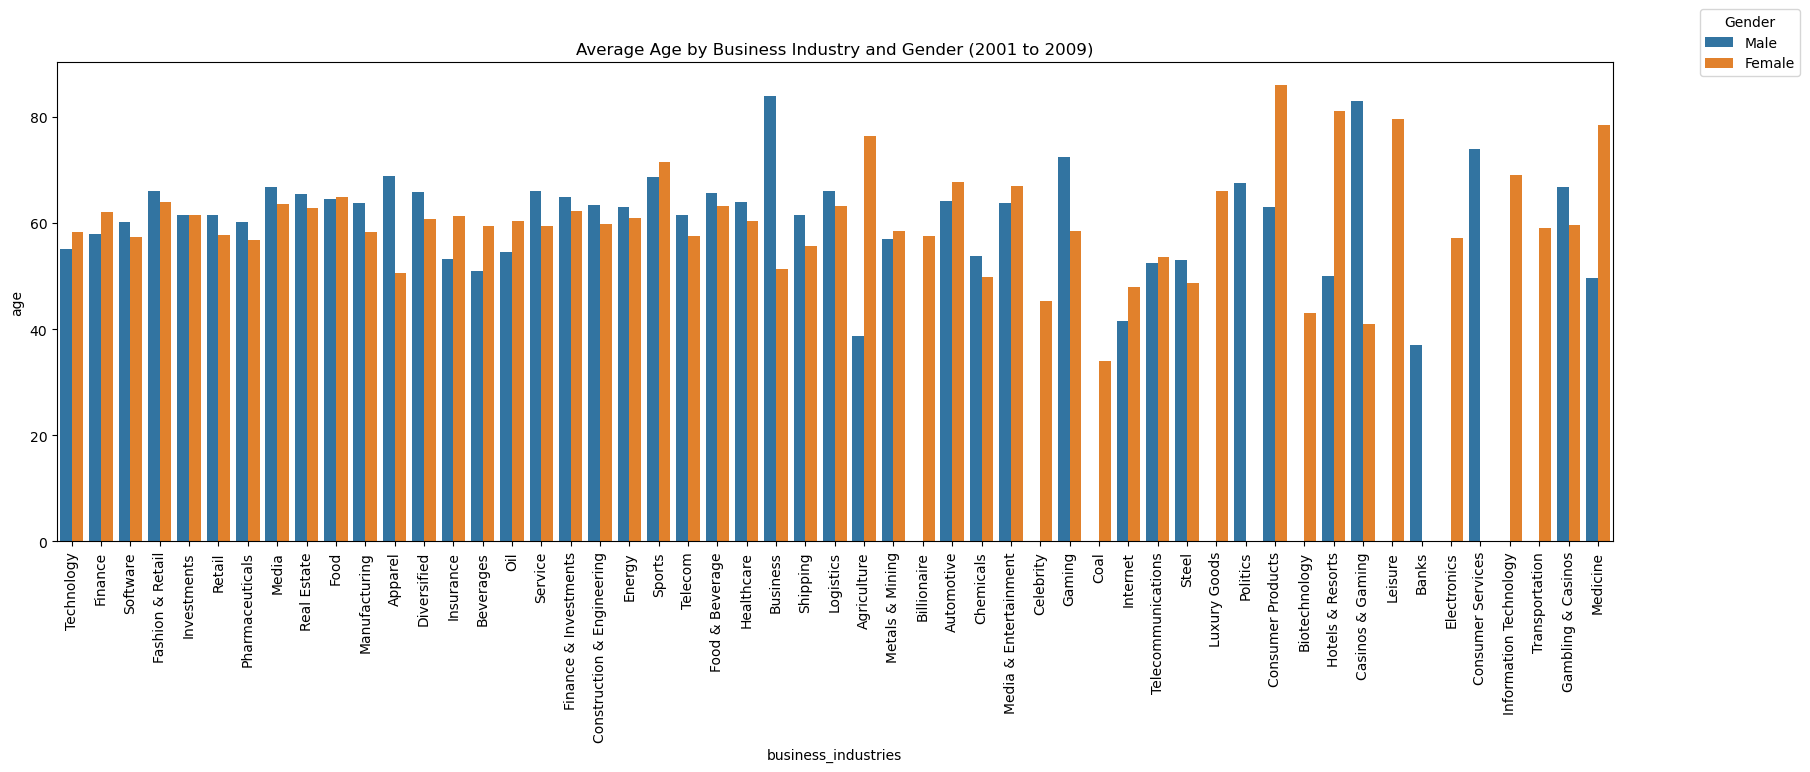

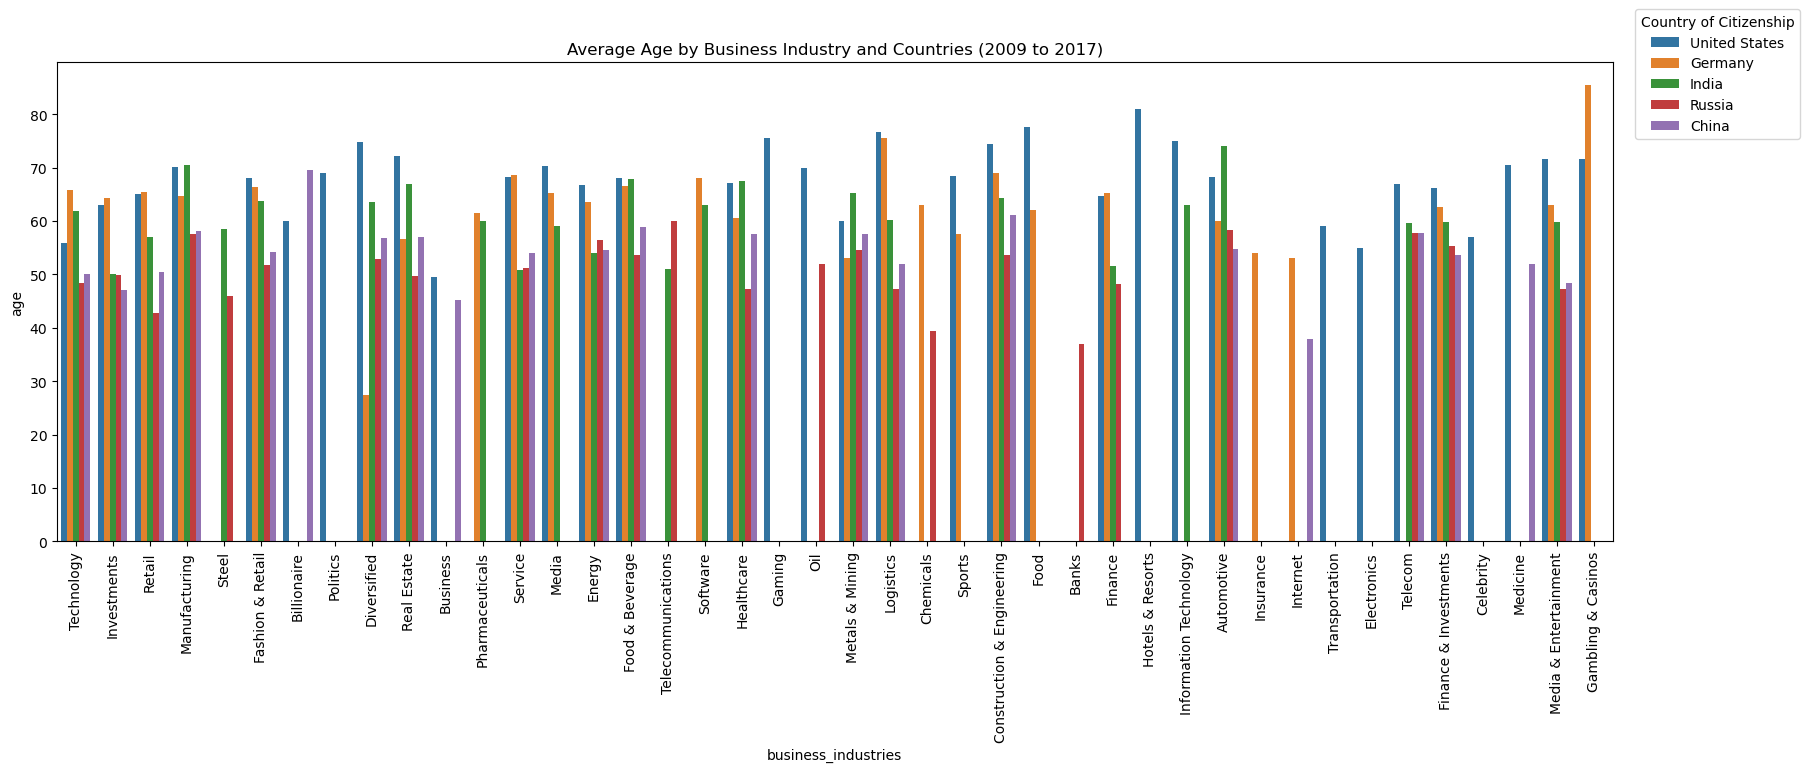

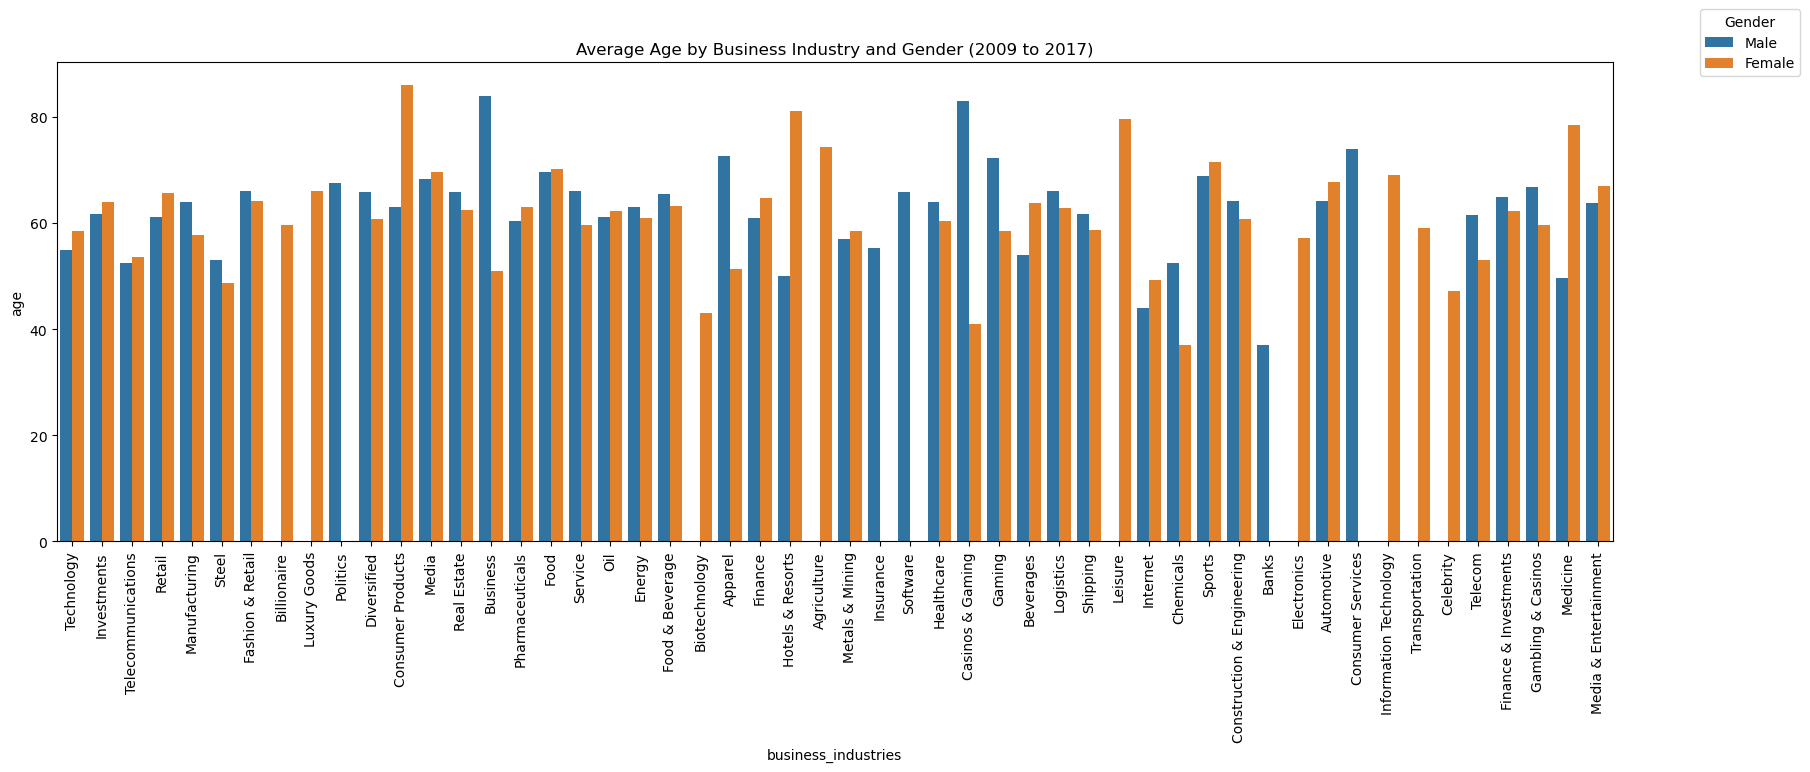

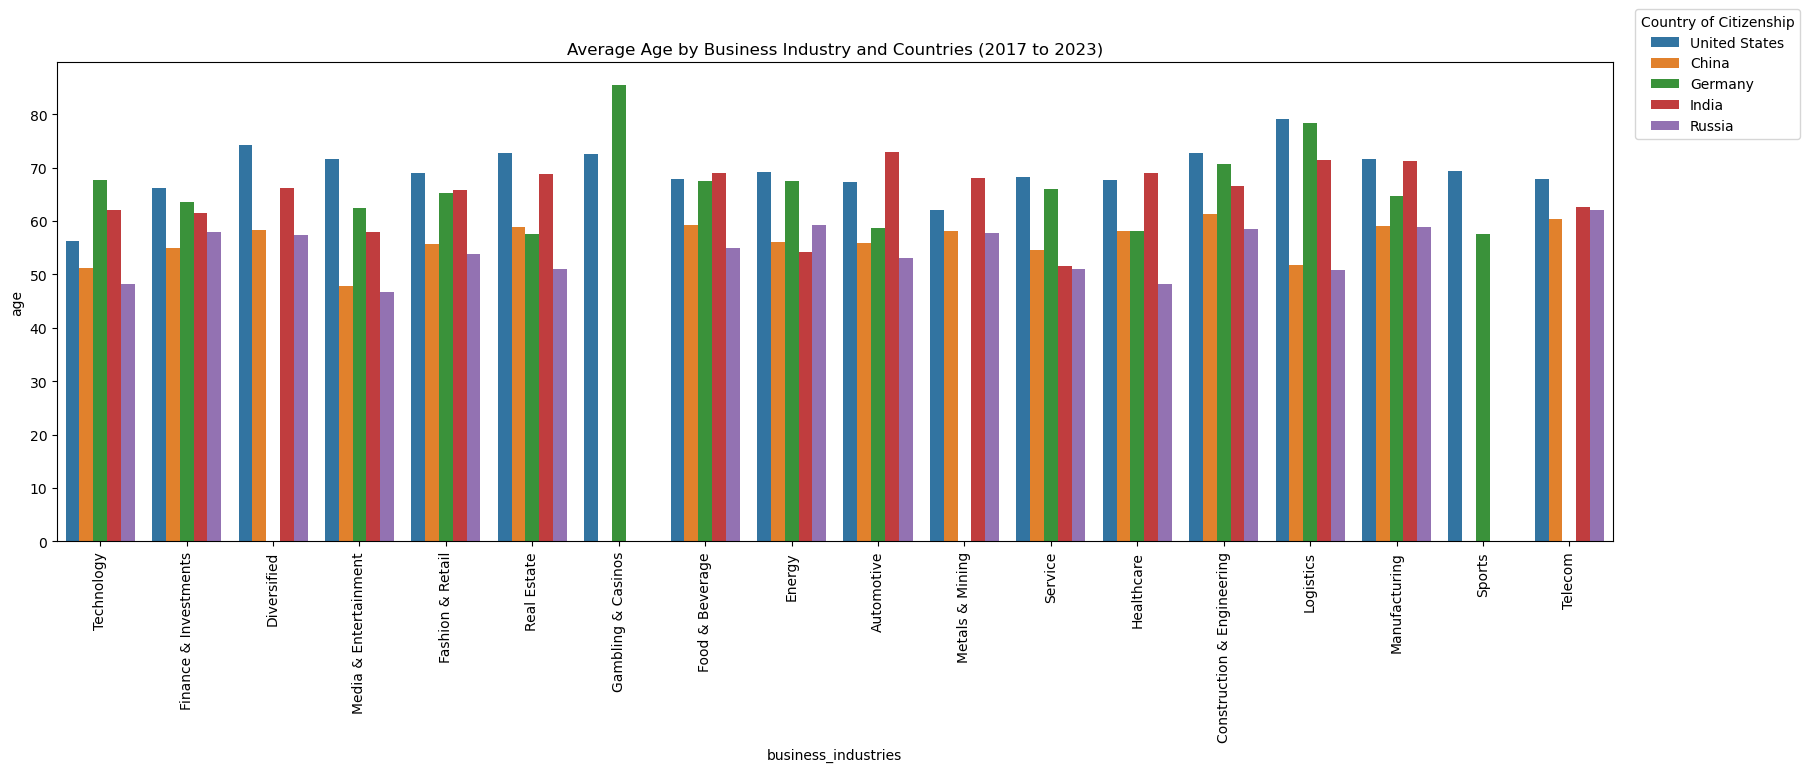

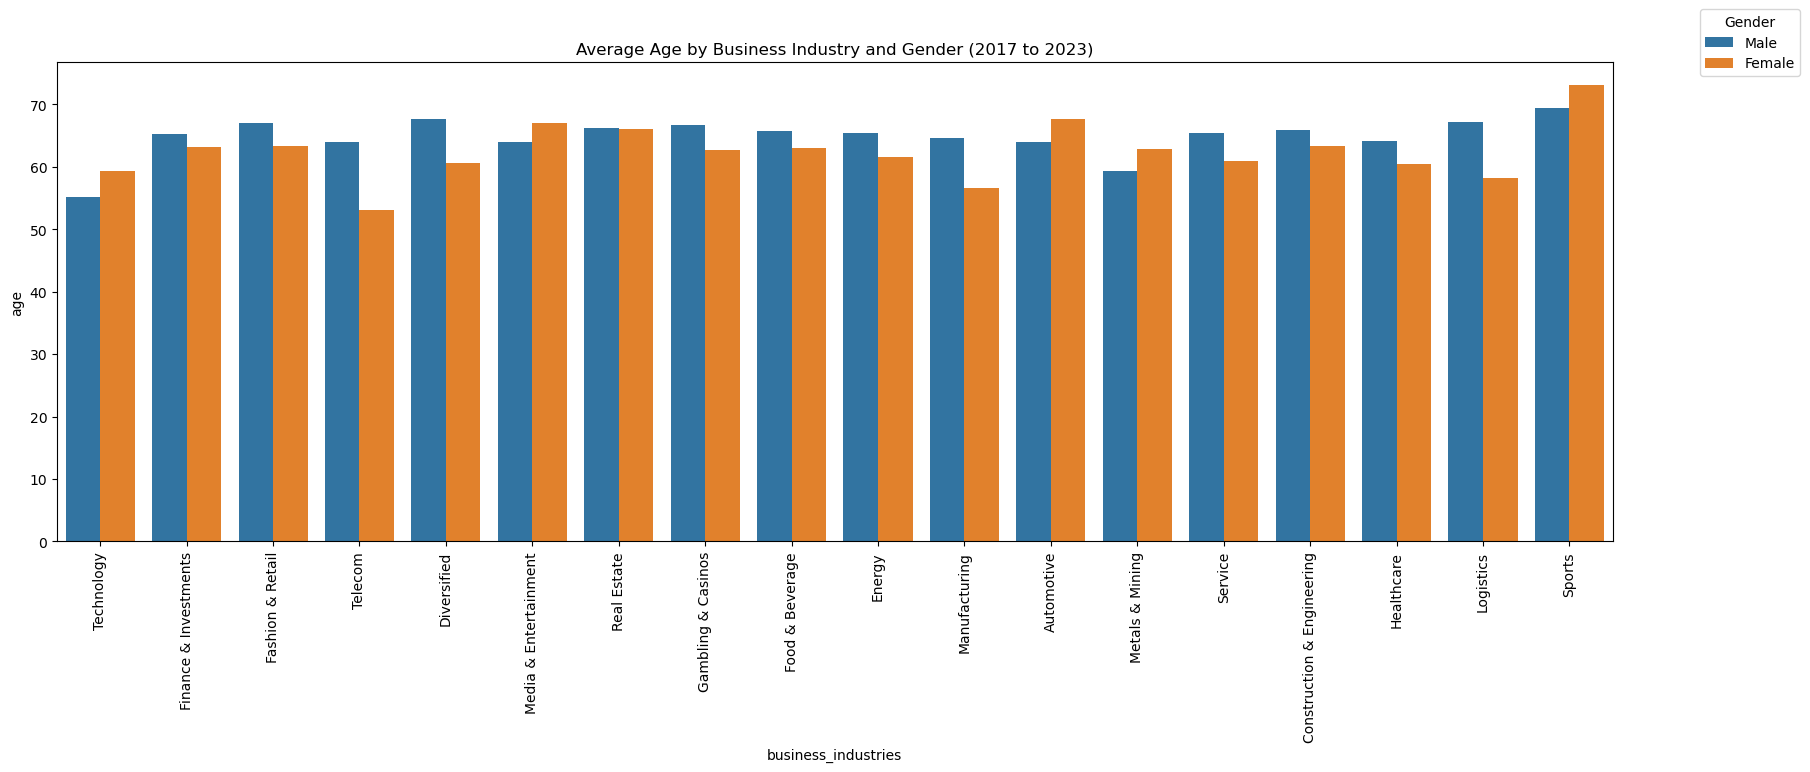

In [37]:
data = df
def barplot(x, y, hue, title, legend_title, data=data):
    plt.figure(figsize=(18, 8))
    ax = sns.barplot(x=x, y=y, data=data, hue=hue, errorbar=None)
    ax.legend(title=legend_title, loc="upper right", bbox_to_anchor=(1.125, 1.125))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


year_step = 8
start_year = data["year"].min()
last_year = data["year"].max()

for year in range(start_year, last_year + 1, year_step):
    data = data[data["year"] >= year]

    # Average age by business industry and top n countries
    n = 5
    top_countries = data['country_of_citizenship'].value_counts().nlargest(n).index.tolist()
    filtered_data = data[data['country_of_citizenship'].isin(top_countries)]

    barplot(x="business_industries",
            y="age",
            hue="country_of_citizenship",
            title="Average Age by Business Industry and Countries ({} to {})".format(year, min(year + year_step, last_year)),
            legend_title="Country of Citizenship",
            data=filtered_data)

    # Average age by business industry and gender
    barplot(x="business_industries",
            y="age",
            hue="gender",
            title="Average Age by Business Industry and Gender ({} to {})".format(year, min(year + year_step, last_year)),
            legend_title="Gender",
            data=data)

### **2.1.2. Relation Between Rank Volaility, Busniess Industry, Origin Country, and Self-made Status** (TODO)
Q: Is there a relation between the rank volatility of Billionaires and their country of residence, business industry, and whether they self-made their wealth or not?

Observations:


### **2.1.3 Industries effect on the distribution of billionaires** (TODO)
Q: How have different industries affected the distribution of billionaires across countries and regions?

In [61]:
data = df
industry_country_counts = data.groupby(['year', 'business_industries', 'country_of_residence']).size().reset_index(name='billionaires_count')
print(industry_country_counts)

# Plot the world map
fig = px.choropleth(industry_country_counts,
                    locations="country_of_residence",
                    locationmode="country names",
                    color="billionaires_count",
                    hover_name="country_of_residence",
                    hover_data=["business_industries", "billionaires_count", "year"],
                    animation_frame="year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Distribution of Billionaires Across Countries and Regions by Industry Over the Years",
                    labels={'billionaires_count': 'Number of Billionaires'}
                   )

fig.show()


      year business_industries country_of_residence  billionaires_count
0     2001             Apparel               France                   1
1     2001             Apparel                Italy                   2
2     2001             Apparel                Japan                   1
3     2001             Apparel                Spain                   1
4     2001             Apparel        United States                   2
...    ...                 ...                  ...                 ...
6740  2023             Telecom               Russia                   1
6741  2023             Telecom          Switzerland                   1
6742  2023             Telecom               Turkey                   1
6743  2023             Telecom       United Kingdom                   3
6744  2023             Telecom        United States                   5

[6745 rows x 4 columns]


### **2.1.4. Concentration of Industries Across Countries**

**Q: Do specific countries or regions have a higher concentration of billionaires who specialize in particular business categories?**

**Observations:**
- United States: 
    - Technology and Finance & Investments are the dominant business categories among billionaires in the United States. 
    - Other significant business categories include Real Estate and Food & Beverages. 

- China: 
    - Technology and Manufacturing are the primary business categories among billionaires in China. 
    - There is also a notable presence of billionaires in the Healthcare and Real Estate sectors. 

- India: 
    - Healthcare, Manufacturing, and Diversified sectors have a significant presence among billionaires in India. 

- Other Countries: 
    - Various business categories are represented among billionaires in other countries such as Russia, Germany, United Kingdom, Switzerland, Hong Kong, Brazil, and Canada. 
    - The concentration of billionaires in specific business categories varies across these regions. 


In [75]:
data = df
filtered_data = data[['country_of_citizenship',
                    'country_of_residence',
                    'business_industries']]

grouped_data = (filtered_data.groupby(['country_of_citizenship',
                                      'business_industries'])
                                      .size()
                                      .reset_index(name='count'))

fig = px.treemap(grouped_data,
                 path=['country_of_citizenship', 'business_industries'],
                 values='count',
                 color='count',
                 color_continuous_scale='Viridis',
                 title='Concentration of Billionaires by Country and Business Industry')


fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

### **2.1.5. Average Net Worth Over Time by Self-Made Status**
**Q: How does the rate of wealth growth or decline vary between self-made and non-self-made billionaires over time?**

**Observations:**
- Self-Made:
    - The average net worth of self-made billionaires shows a general increasing trend over time, with some fluctuations, experiencing a significant leap upwards from 2009 to 2011.
    - Overall, the trend appears to be upward.

- Non-Self-Made:
    - The average net worth of non-self-made billionaires also displays fluctuations over time.
    - However, the trend seems to be less volatile compared to self-made billionaires, and the overall trend is moving upward.


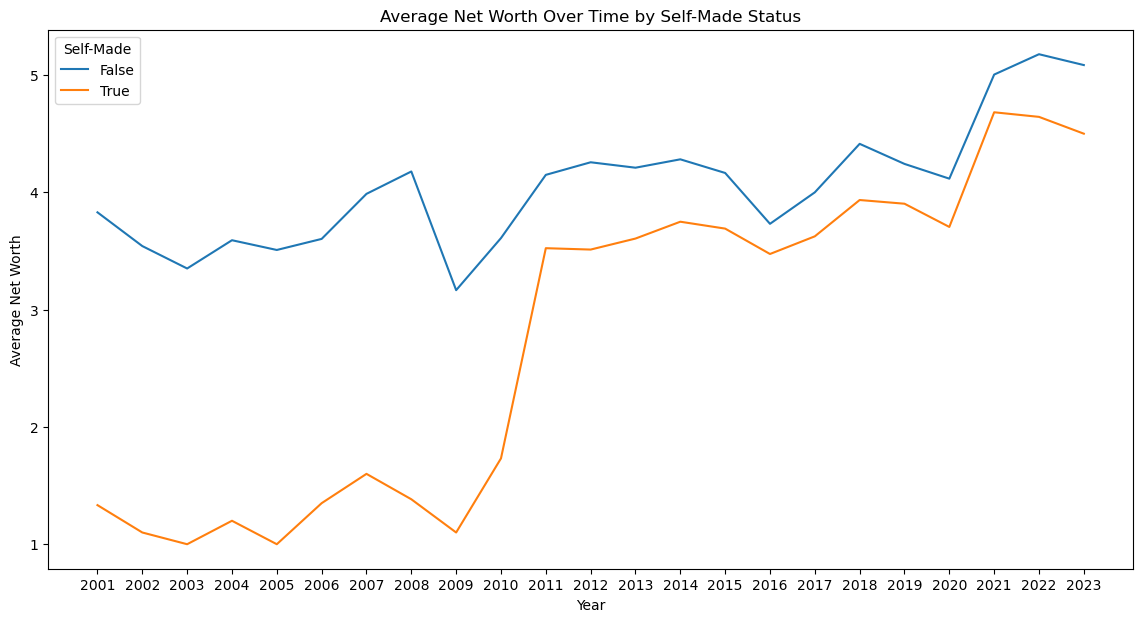

In [96]:
data = df

plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='year', y='net_worth', hue='self_made', errorbar=None)
plt.title('Average Net Worth Over Time by Self-Made Status')
plt.xlabel('Year')
plt.xticks(data["year"].unique())
plt.ylabel('Average Net Worth')
plt.legend(title='Self-Made')
plt.show()

### **2.1.6. Top industies of Billionaries Concentration**
**Q: What are the top 3 industries with the highest concentration of billionaires, and how does this distribution change over the years?**



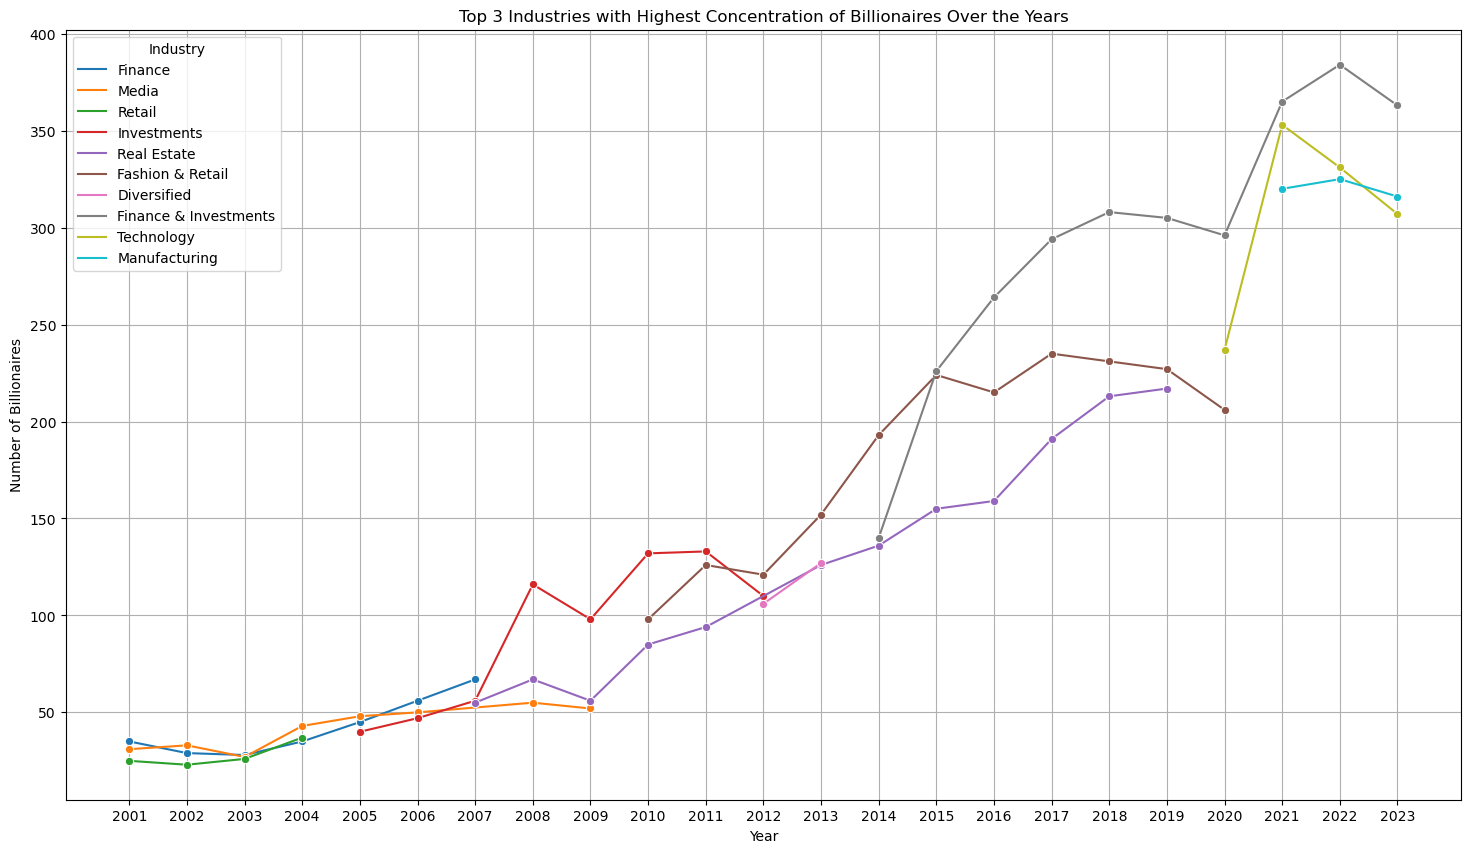

In [103]:
data = df

industry_counts = data.groupby(['year', 'business_industries']).size().reset_index(name='count')
top3_industries = industry_counts.groupby('year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

plt.figure(figsize=(18, 10))
sns.lineplot(data=top3_industries, x='year', y='count', hue='business_industries', marker='o')
plt.title('Top 3 Industries with Highest Concentration of Billionaires Over the Years')
plt.xlabel('Year')
plt.xticks(top3_industries['year'].unique())
plt.ylabel('Number of Billionaires')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

### **2.1.8. Concentration of Billionaries across top industries**
Q: What are the top 3 industries with the highest concentration of billionaires, and how does this distribution change over the years? 

In [ ]:
data = df.groupby('business_industries')
data

### **2.1.9.**
Q: 

In [ ]:
import plotly.express as px
import pandas as pd


# Import data from USGS
data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')


# Drop rows with missing or invalid values in the 'mag' column
data = data.dropna(subset=['mag'])
data = data[data.mag >= 0]


# Create scatter map
fig = (px.scatter_geo(data, lat='latitude', lon='longitude', color='mag',
                    hover_name='place', #size='mag',
                    title='Earthquakes Around the World'))
fig.show()

### **2.1.10.**

Context: You would like to start a new business in 2024, but you want your business to be special through a product the bridges some different industries, so you need to choose the best industries to bridge.
#### **Q: What are the industries that are more guaranteed to generate profit based on the number of billionaires that work in the industry and the amount of net worth they have from their industries?**
*Features: industries, years, net worth, full_name*

#### **Answer:**

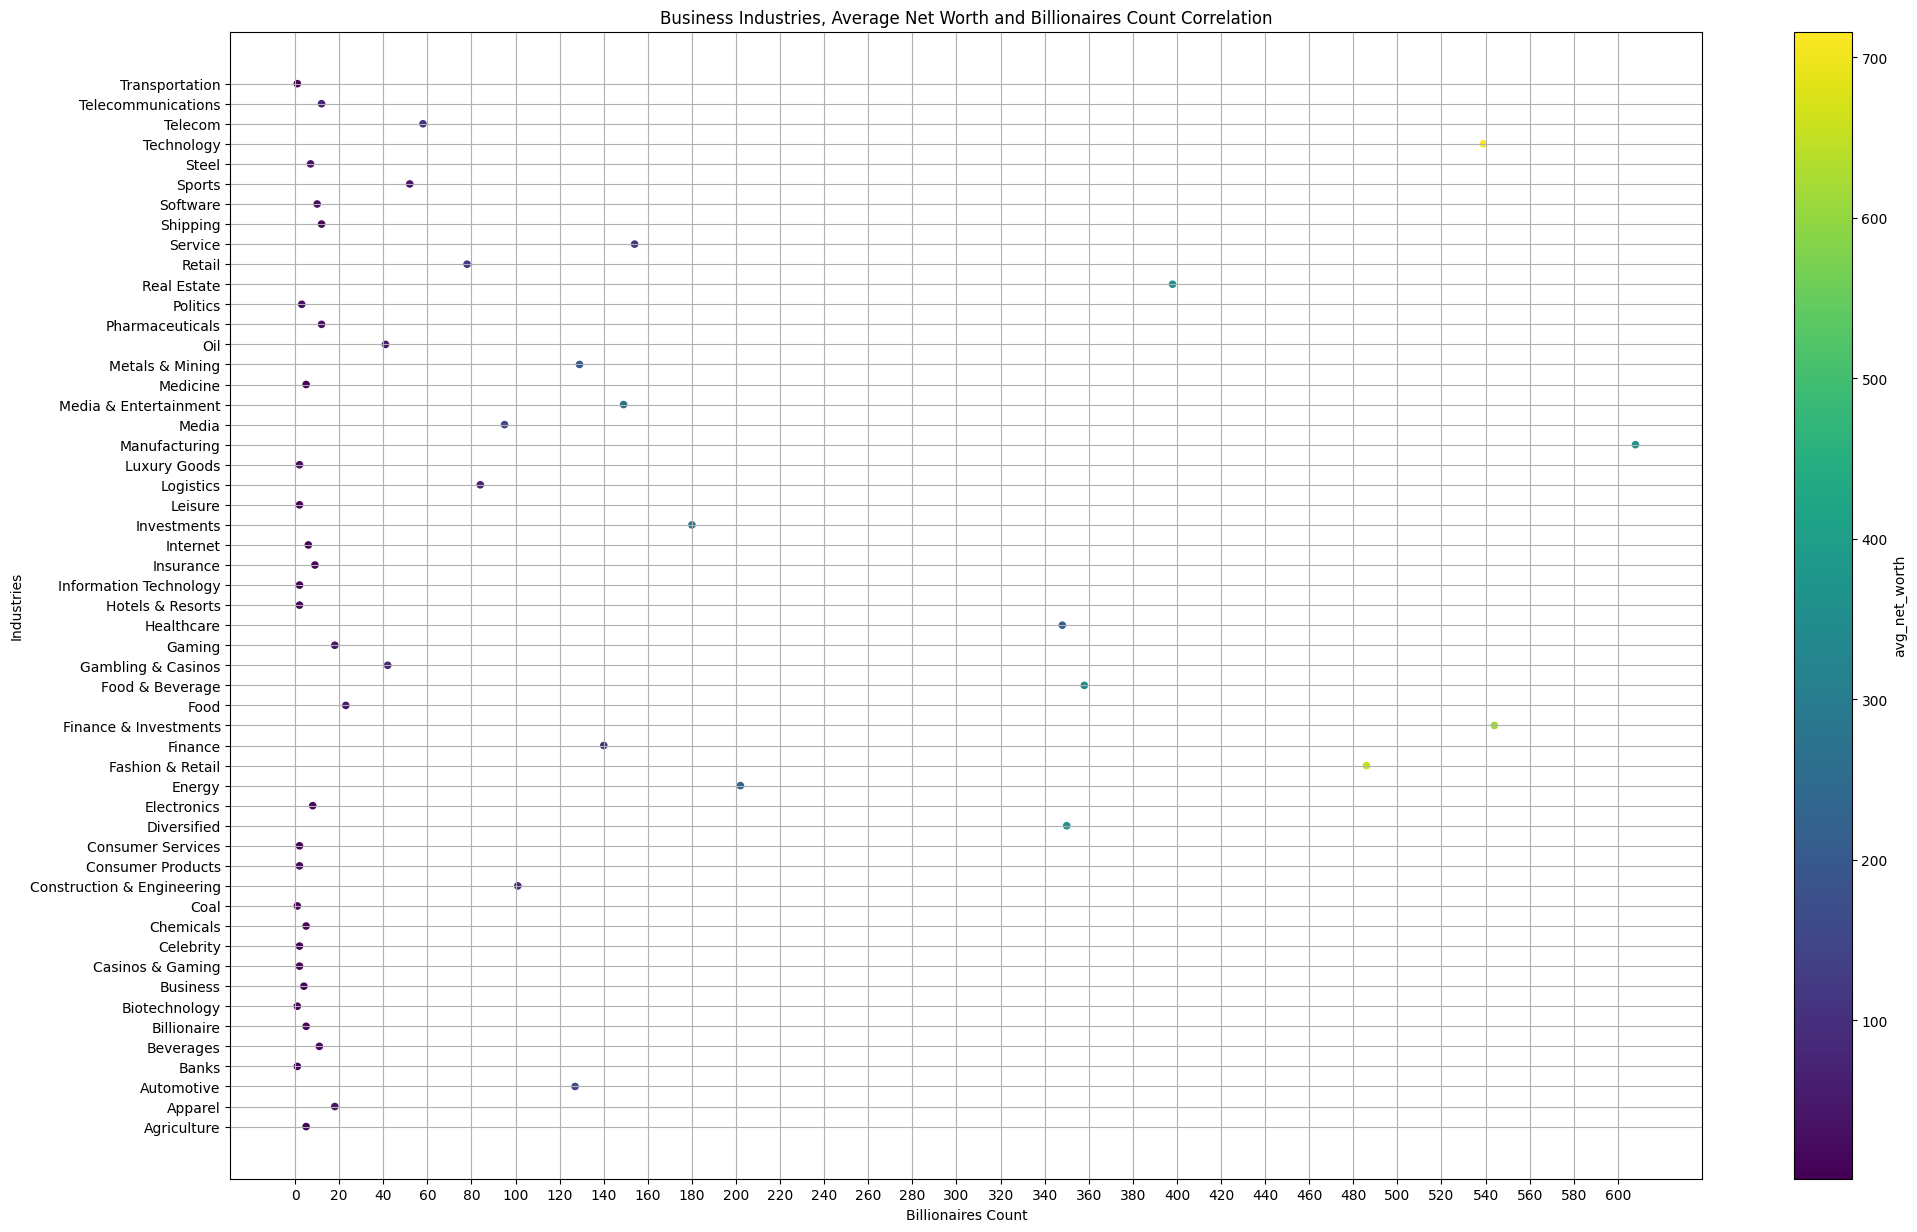

In [19]:
industry_net_worth_sum = df.groupby(['business_industries', 'year'])['net_worth'].sum()

# Calculating the average net worth for each industry over the years
industry_avg_net_worth = industry_net_worth_sum.groupby('business_industries').mean()

# Getting the count of billionaires for each industry
industry_count = df.groupby('business_industries')['full_name'].nunique()

# Extracting industry names and data for plotting
industries = industry_avg_net_worth.index.tolist()
avg_net_worth = industry_avg_net_worth.values.tolist()
billionaires_count = industry_count.values.tolist()

# Creating a DataFrame
data = {
    'industries': industries,
    'avg_net_worth': avg_net_worth,
    'billionaires_count': billionaires_count
}
df_plt = pd.DataFrame(data)

# Plotting scatter plot
df_plt.plot.scatter(x='billionaires_count', y='industries', title='Business Industries, Average Net Worth and Billionaires Count Correlation', c='avg_net_worth', colormap='viridis') 
plt.xlabel('Billionaires Count')
plt.ylabel('Industries') 
plt.subplots_adjust(top=2.5, right=3)
plt.grid(True) 
plt.xticks(np.arange(0, df_plt['billionaires_count'].max(), 20))
plt.show()

### **2.1.11.** 

Context: You want to invest your money in some startups, but you would like to make sure that your investment is in only the safest industries.
#### **Q: What are the safest industries to invest in that grew (or) took the least damage during the global economic crisis in 2008 and Covid?**
*Features: industries, years, net worth*

#### **Answer:**

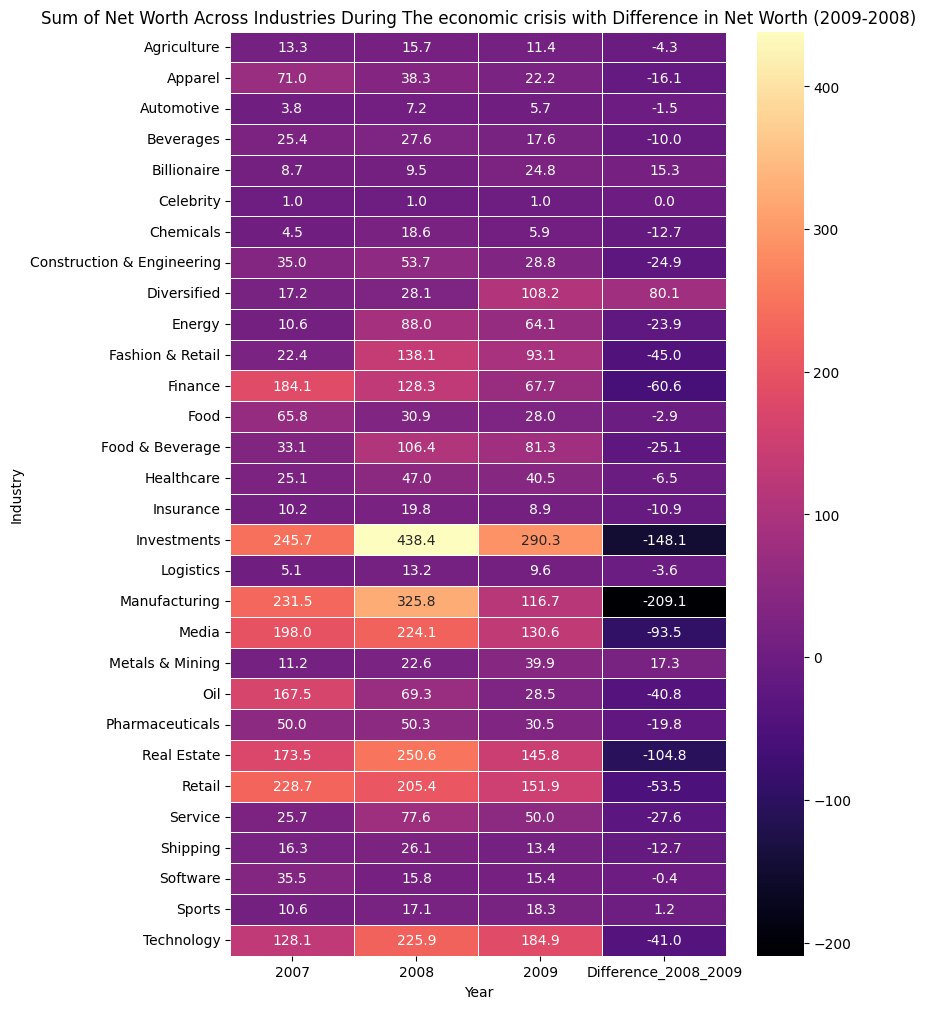

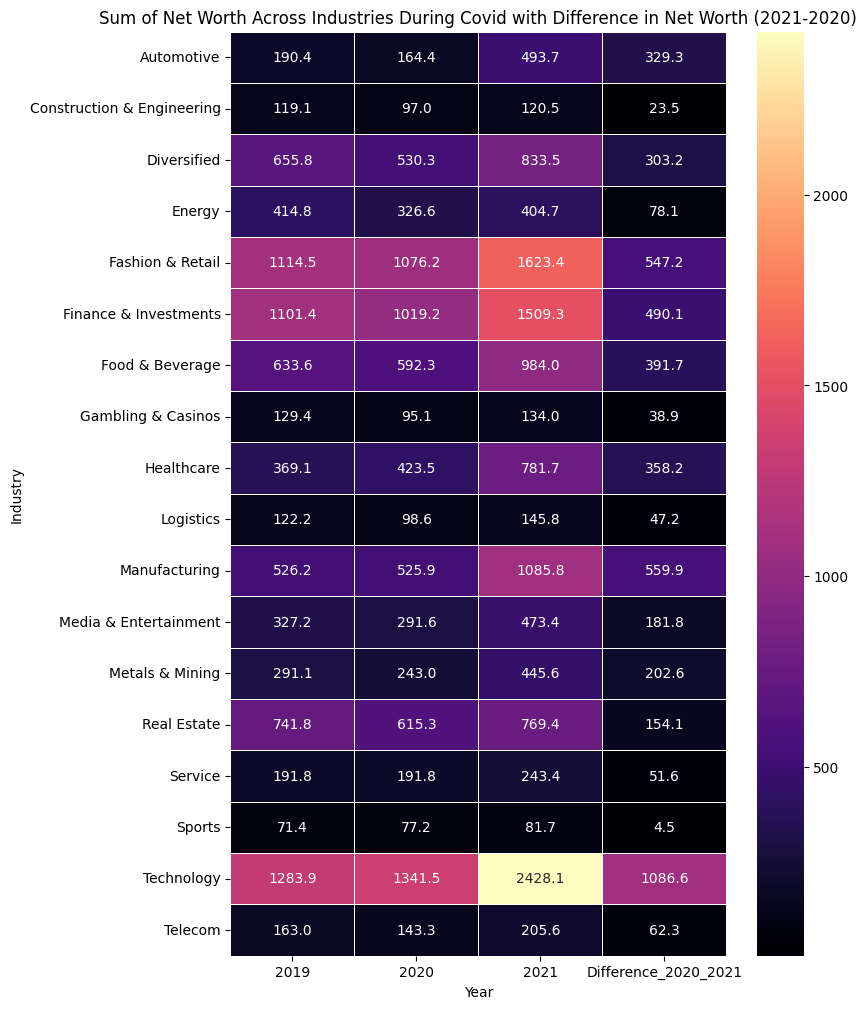

In [20]:
def study_years(year1, year2,year3, text):
    # Filter data for the years 
    filtered_data_year1 = df[df['year'] == year1]['business_industries']
    filtered_data_year2 = df[df['year'] == year2]['business_industries']
    filtered_data_year3 = df[df['year'] == year3]['business_industries']

    common_data = set(filtered_data_year1) & set(filtered_data_year2) & set(filtered_data_year3)

    filtered_common_data = df[df['business_industries'].isin(common_data)]

    filtered_data = filtered_common_data[filtered_common_data['year'].isin([year1, year2, year3])]

    # Group data by year and industry, and sum the net worth
    grouped_data = filtered_data.groupby(['year', 'business_industries'])['net_worth'].sum().reset_index()

    # Pivot the data for easy plotting
    pivot_data = grouped_data.pivot(index='business_industries', columns='year', values='net_worth')

    # Calculate the difference between year2 and year3 net worth for each industry
    pivot_data[f'Difference_{year2}_{year3}'] = pivot_data[year3] - pivot_data[year2]

    # Plotting
    plt.figure(figsize=(8, 12))
    sns.heatmap(pivot_data, cmap='magma', annot=True, fmt=".1f", linewidths=0.5)
    plt.title(f'Sum of Net Worth Across Industries During {text} with Difference in Net Worth ({year3}-{year2})')
    plt.xlabel('Year')
    plt.ylabel('Industry')
    plt.show() 
study_years(2007,2008,2009, "The Economic Crisis")
study_years(2019,2020,2021, "Covid")